## This tutorial is for using kebnekaise and abisko cluster made on July 21, 2020

### All the information comes from this link:
https://www.hpc2n.umu.se/

## Structure of a cluster: 
1) Each node consist of One or Two CPUs. Each CPU has more than one core. Memory is shared between cores but not among CPUs. 

2) OpenMP is a multi-threaded SHARED_MEMORY programing paradigm--not good for clusters unless many cores per CPU and much memory per CPU.

3)Parallalization could be on 1) Data (run program on smaller parts of data)  2)on CPU and shared memory (line MPI,..)

4) MPI is a language independent Communications protocol


## How to log in to kebnekaise or abisko 

The most common ways
#### Through ssh by:

ssh username@abisko.hpc2n.umu.se

ssh username@kebnekaise.hpc2n.umu.se

#### Through Thinlink:

server:  kebnekaise-tl.hpc2n.umu.se


There are so many ways to follow:

https://www.hpc2n.umu.se/documentation/guides/linux-connection

## Where to store files
The available memory for users will be shown by typing:
quota

and this will appear:

Filesystem            usage       quota   remark

/home/s/username       2.51MB      1.91GB   0.1% used

/pfs/nobackup      153.10MB     25.00GB   0.6% used

file count            479      100000   0.5% used

Everyone has only 25 GBs on /pfs/nobackup drive and around 2 GB on /home/s/username


***We should run jobs from /pfs/nobackup drive NOT from home directory***

For having more space, PI needs to apply for a storage project like the one we have on lunarc (small,medium, large)

and they allocate space on /pfs/proj/nobackup/

A more detailed explanation exists on:

https://www.hpc2n.umu.se/documentation/filesystems/overview

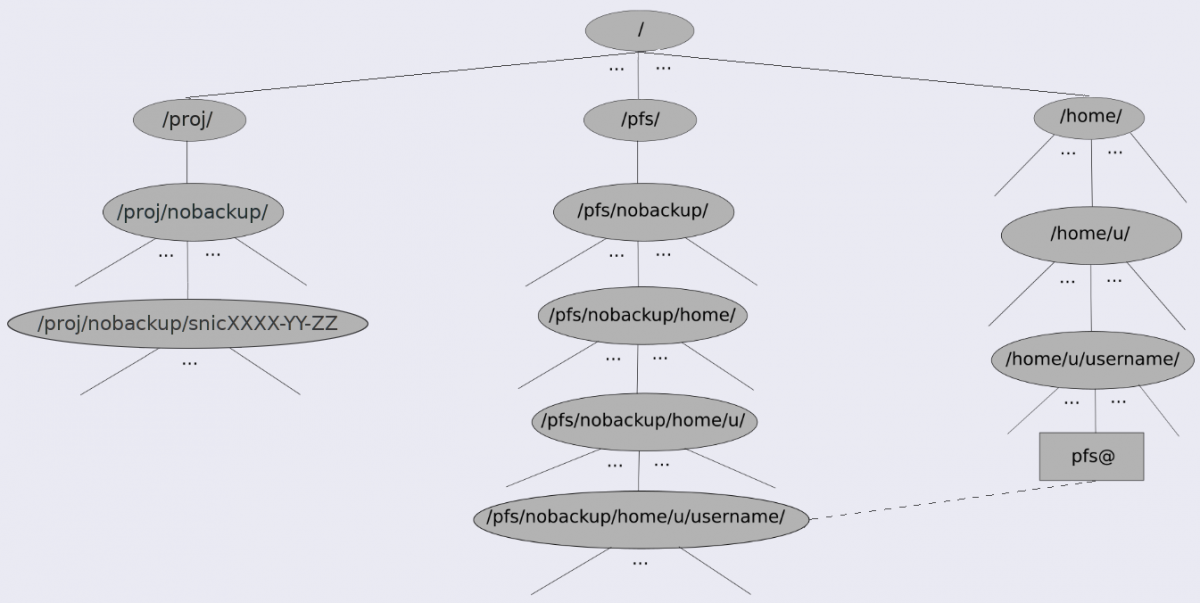

## Installed softwares and how to use them

ml : this will list all the loaded modules

ml av : will show all the available modules

ml spider module_name: will give the information and dependencies of the "module_name" module

ml module_name: load the module


### Accessing Virtualenv

Using Virtualenv with HPC2N Python modules
Virtualenv is installed with each of the loadable Python modules and is accessible after the Python module is loaded. 

Load the module containing the Python version that you want to use, see the support pages for how to use the module system if you are unfamiliar with it.

    ml Python-bare/


Now you want to create your first virtual environment. Here I call it 'vpyenv', and put it in your Public, but you can call it anything, of course. Run the following to initialize the environment:



    virtualenv --system-site-packages $HOME/Public/vpyenv
I have created my own environment as 
    
    virtualenv --system-site-packages /pfs/nobackup/$HOME/myenv
Then I activate it each time as
    
    source /pfs/nobackup/$HOME/myenv/bin/activate
$HOME is /home/s/salmak/ directory


After activating my environment, I could run my script after installing couples of packages I wanted.


### Submit a job

A simple job sample is as follows in kebnekaise
################################################################
#!/bin/bash

#Put in actual SNIC number
#SBATCH -A snic2020-9-99 #project number in supr snic
#SBATCH -n 1
#SBATCH -c 1
#SBATCH -J torch_mnist
#SBATCH --time=00:15:00

###SBATCH -p largemem  #This is still not working


#ml purge > /dev/null 2>&1 # Ignore warnings from purge
#ml icc/2018.1.163-GCC-6.4.0-2.28  impi/2018.1.163
#ml ifort/2018.1.163-GCC-6.4.0-2.28  impi/2018.1.163

#to change the default platforms diretory
#source /pfs/nobackup/home/m/salmak/etc/settings.sh

#run the program
python ../torch_mnist.py

#################################################################

I activate my environment as

    source /pfs/nobackup/home/s/salmak/myenv/bin/activate
    
each time and then submit my python job after that.

    sbatch myjob.sh
    


## Job status

To see status of partitions and nodes, use

    $ sinfo

To get the status of all SLURM jobs

    $ squeue

To only view the jobs in the bigmem partition (Abisko)

    $ squeue -p bigmem

To only view the jobs in the largemem partition (Kebnekaise)

    $ queue -p largemem

Get the status of an individual job

    $ scontrol show job <jobid>
    
    
A more detailed explanations on job design is here:

https://www.hpc2n.umu.se/documentation/batchsystem/slurm-submit-file-design

## Memory usage
RAM per core 

    Abisko 	2500 MB

    Abisko bigmem 	10750 MB
    
    Kebnekaise 	4500 MB
    
    Kebnekaise largemem 	41666 MB

Each core has a limited amount of memory available. If your job requires more memory than the default, you can allocate more cores for your task with (-c).

If, for instance, you need 5000MB/task on Abisko, set "-c 2".

Example:

#I need 2 x 2500MB (5000MB) of memory for my job on Abisko.
#SBATCH -c 2

## Using the GPU nodes

We have two types of GPU cards available on Kebnekaise, NVIDIA Tesla K80 (Kepler) and NVIDIA Tesla V100 (Volta).

To request GPU resources one has to include a GRES in the submit file. The general format is:

    #SBATCH --gres=gpu:<type-of-card>:x

where <type-of-card> is either k80 or v100 and x = 1, 2, or 4 (4 only for the K80 type).

The K80 enabled nodes contain either two or four K80 cards, each K80 card contains two gpu engines.

The V100 enabled nodes contain two V100 cards each.

On the dual card nodes one can request either a single card (x = 1) or both (x = 2). For each requested card, a whole CPU socket (14 cores) is also dedicated on the same node. Each card is connected to the PCI-express bus of the corresponding CPU socket.

When requesting two or four K80 cards, one must also use "--exclusive" (this does not apply when requesting V100 cards).

One can activate Nvidia Multi Process Service (MPS), if so required, by using:
    
    #SBATCH --gres=gpu:k80:x,xmps

If the code that is going to run on the allocated resources expects the gpus to be in exclusive mode (default is shared), this can be selected with "gpuexcl", like this:

    #SBATCH --gres=gpu:v100:x,gpuexcl

## Using the large memory nodes

Using the large memory nodes requires the project to have an allocation on that sub-resource of Kebnekaise. It is called "Kebnekaise Large Memory" in SUPR.

In the submit file one has to specify the large memory partition like this:

    #SBATCH -p largemem
    
    
A more detailed explanation is here:
    
https://www.hpc2n.umu.se/documentation/guides/using_kebnekaise